In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
dataset = load_breast_cancer()

In [7]:
x = dataset.data
y= dataset.target

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 4)

In [9]:
#Using KNN model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.8951048951048951

In [11]:
#left use through bagging classifier
bagg_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors = 5), n_estimators = 9, max_samples = 0.7, bootstrap = True, oob_score = True)

In [12]:
bagg_knn.fit(x_train, y_train)
bagg_knn.score(x_test, y_test)

0.8881118881118881

In [13]:
#pasting
pasting_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors = 5), n_estimators = 9, max_samples = 0.7, bootstrap = False)
pasting_knn.fit(x_train, y_train)
pasting_knn.score(x_test, y_test)

0.8951048951048951

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [19]:
df = pd.read_csv('cardio_train.csv', sep= ';')

In [20]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [21]:
df.shape

(69301, 13)

In [22]:
df.drop('id', axis = 1, inplace = True)

In [23]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.shape

(69277, 12)

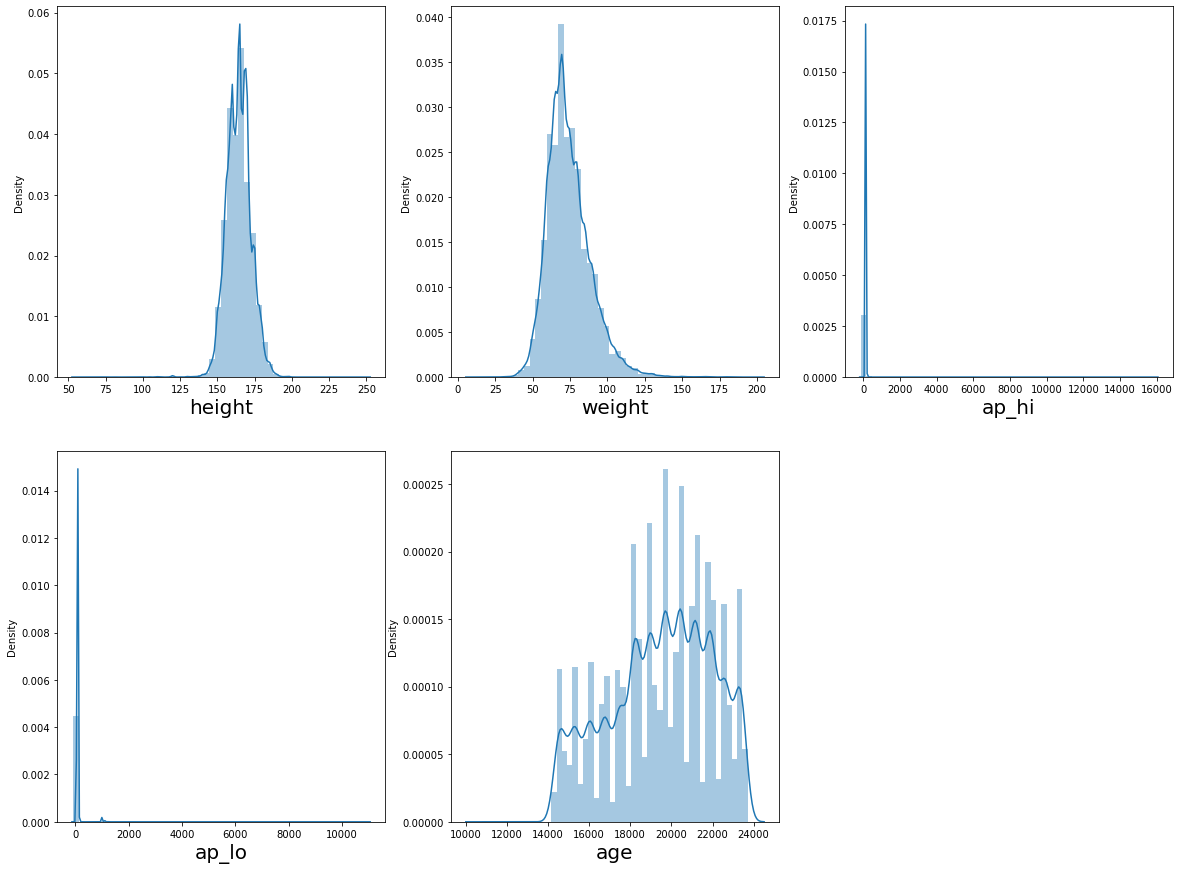

In [18]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df[['height', 'weight', 'ap_hi', 'ap_lo', 'age']]:
    if plotnumber <=6:
        ax = plt.subplot(2, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1 
plt.show()



In [17]:
#removing outliers using z distribution
from scipy.stats import zscore

In [18]:
z_score = zscore(df[['height', 'weight', 'ap_hi', 'ap_lo', 'age']])

NameError: name 'df' is not defined

In [21]:
abs_z_score = np.abs(z_score)

In [22]:
filtering_entry =(abs_z_score < 3).all(axis = 1)


In [23]:
df = df[filtering_entry]
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000
mean,19466.779053,1.347268,164.374555,73.566278,126.164430,81.286001,1.362010,1.223575,0.087159,0.053281,0.803949,0.492815
std,2467.040240,0.476105,7.690310,13.195627,17.860035,10.236086,0.677075,0.569505,0.282069,0.224595,0.397011,0.499952
min,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df[['height', 'weight', 'ap_hi', 'ap_lo', 'age']]:
    if plotnumber <=6:
        ax = plt.subplot(2, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1 
plt.show()

NameError: name 'df' is not defined

<Figure size 1440x1080 with 0 Axes>

In [25]:
x = df.drop(columns = ['cardio'], axis = 1)

In [26]:
y = df['cardio']

In [27]:
#parametet tuning
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state =41)

In [28]:
clf = RandomForestClassifier()

In [2]:
params= {'n_estimators': [11, 13, 15, 17 ,19, 21, 23, 25], 'criterion': ['entropy', 'gini'], 'max_depth': [10, 15, 17, 19], 'min_samples_split':[10, 12, 14, 15], 'min_sample_leaf':[5, 6, 7, 8]}

In [3]:
grd = GridSearchCV(clf, param_grid = params)

NameError: name 'GridSearchCV' is not defined